In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [5]:
# ubah nama kolom
df = df.rename(columns = {'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# ubah data kategorik jadi numerik
df['gender'].replace(['Female','Male'], [0,1], inplace=True)
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [8]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
x = df.drop(['CustomerID', 'gender'], axis=1)

# membuat list berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters = i).fit(x)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

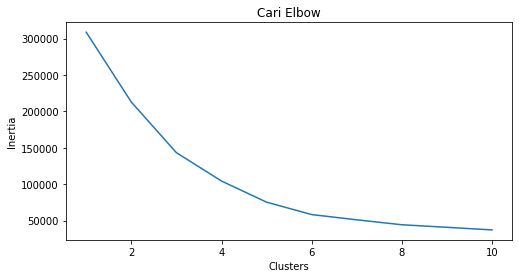

In [9]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


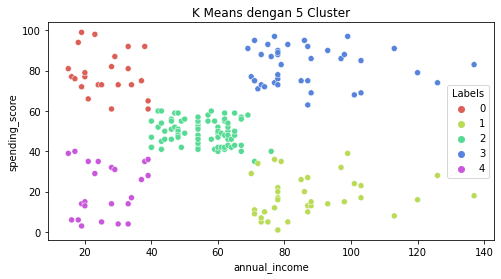

In [10]:
# membuat objek k-means
km5 = KMeans(n_clusters = 5).fit(x)

# menambahkan kolom label pada datasets
x['Labels'] = km5.labels_

# membuat plot k-means dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('K Means dengan 5 Cluster')
plt.show()